# Data quality
In this notebook we analyze the data quality refered to COVID19 in Mexico. This information in obtained thought the Secretariat of Health and published by the mexican *Dirección General de Epidemiología*. https://www.gob.mx/salud/documentos/datos-abiertos-152127. 

In [1]:

import glob
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib 
import datetime
from IPython.display import Markdown as md


Using matplotlib backend: MacOSX


## Load data

In [ ]:

# load the csv from the src folder
strpath = '../src/'
m = []
i =0
if not os.path.isfile('fulldb1.csv'):
    for filename in glob.glob(strpath+"*"):
        if filename.find('.csv')>0:
            date = '20'+filename[7:9] +'-' + filename[11:13] +'-' +filename[13:15]
            #print(date)
            df = pd.read_csv(filename, encoding = "ISO-8859-1",dtype =str)
            df['FechaRegistro'] = date
            df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)
            if i== 0:
                df0=df.copy()
                i=1
            else:
                frame = [df0,df]
                df0 = pd.concat(frame)
            del df
else:
    df0 = pd.read_csv('fulldb.csv')
    df0.FechaRegistro = pd.to_datetime(df0['FechaRegistro'], format='%Y-%m-%d')
    lastdateRecord = df0.FechaRegistro.max()
    deltaT = datetime.datetime.now() - lastdateRecord
    for i in range(1,deltaT.days+1) :
        filename = (lastdateRecord + datetime.timedelta(days=1)).strftime("%Y%m%d")+'.csv'
        df = pd.read_csv(strpath+filename, encoding = "ISO-8859-1",dtype =str)
        df['FechaRegistro'] = (lastdateRecord + datetime.timedelta(days=1)).strftime("%Y-%m-%d")
        df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)

len(df0)

In [ ]:
# we sorted the value by 
df0 = df0.sort_values(by='FechaRegistro', ascending=False)
df0.head()

In [ ]:
# fr=2 #GHz
# df0.shape
md(f"We have {0} records of covid evolution cases in Mexico until today{1}".format(df0.shape(0), datetime.datetime.now()) )


We have 21,546,898 records of covid evolution cases in Mexico 

In [7]:
df0.FechaRegistro = pd.to_datetime(df0['FechaRegistro'], format='%Y-%m-%d')

/Users/jorge.urteaga/opt/anaconda3/lib/python3.7/site-packages/pandas/core/internals/blocks.py:386: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  self.values = np.delete(self.values, loc, 0)
/Users/jorge.urteaga/opt/anaconda3/lib/python3.7/site-packages/pandas/core/internals/blocks.py:387: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  self.mgr_locs = self.mgr_locs.delete(loc)


In [163]:
#today = (datetime.datetime.now()).strftime("%Y%m%d")
today = (datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y%m%d")
yesterday = (datetime.datetime.now() - datetime.timedelta(days=2)).strftime("%Y%m%d")
ereyesterday = (datetime.datetime.now() - datetime.timedelta(days=3)).strftime("%Y%m%d")
df= pd.read_csv( '../src/'+today       +'.csv', encoding = "ISO-8859-1",dtype =str)
dfA= pd.read_csv('../src/'+yesterday   +'.csv', encoding = "ISO-8859-1",dtype =str)
dfB= pd.read_csv('../src/'+ereyesterday+'.csv', encoding = "ISO-8859-1",dtype =str)

We want to know if the cases that has been published in previews days are still in the last report. 

In [8]:
# we get unique cases globaly and from the last csv 
global_ids = df0.ID_REGISTRO.unique().tolist()
last_ids  = df.ID_REGISTRO.unique().tolist()
# we get the cases that are present in previous reports but they doesn't show in the last report
untracket_cases = set(global_ids)- set(last_ids)

In [63]:
tracket_cases = set(global_ids)- set(untracket_cases)

(21918906, 36)

In [49]:
df0.FECHA_SINTOMAS = pd.to_datetime(df0['FECHA_SINTOMAS'], format ='%Y-%m-%d')

In [51]:
df0['FECHA_SINTOMAS'].min()

Timestamp('2020-01-01 00:00:00')

In [54]:
df0[df0['FECHA_SINTOMAS']=='2020-01-01']

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro
106885,2020-06-04,0c745e,2,4,09,1,09,09,008,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2020-06-04
109525,2020-06-04,0bc511,2,4,09,2,09,09,002,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2020-06-04
109548,2020-06-04,082032,2,4,14,2,14,14,039,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2020-06-04
110590,2020-06-04,031621,2,4,09,2,09,09,002,2,...,2,2,2,99,2,99,MÃ©xico,99,2,2020-06-04
111805,2020-06-04,073494,2,4,23,2,07,23,005,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2020-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377920,2020-06-21,044d0d,2,4,09,1,09,09,015,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2020-06-21
381950,2020-06-21,1dc68d,2,4,14,1,14,14,101,2,...,2,2,2,99,2,99,MÃ©xico,99,2,2020-06-21
397140,2020-06-21,033221,2,12,05,1,28,05,030,1,...,2,2,2,1,2,99,MÃ©xico,99,97,2020-06-21
405742,2020-06-21,0bdf57,2,4,09,1,09,15,104,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2020-06-21


In [66]:
first= pd.read_csv( '../src/'+'20200412'       +'.csv', encoding = "ISO-8859-1",dtype =str)


In [67]:
first.FECHA_SINTOMAS = pd.to_datetime(first['FECHA_SINTOMAS'], format ='%Y-%m-%d')

In [68]:
first.FECHA_SINTOMAS.min()

Timestamp('2020-01-01 00:00:00')

In [83]:
# dfO1 = dfO1.drop_duplicates('ID_REGISTRO',keep='first')
#




RESULTADO
1      19
2    2020
3       5
Name: RESULTADO, dtype: int64

In [78]:
first[first.FECHA_SINTOMAS<'2020-02-28']
#.groupby('RESULTADO')['RESULTADO'].count()

RESULTADO
1     13
2    445
3     18
Name: RESULTADO, dtype: int64

In [168]:
df[df.FECHA_SINTOMAS<'2020-02-28'].groupby('RESULTADO')['RESULTADO'].count()

RESULTADO
1      17
2    1974
3       5
Name: RESULTADO, dtype: int64

In [98]:
first[first.FECHA_SINTOMAS<'2020-02-28'].groupby('RESULTADO')['RESULTADO'].count()

RESULTADO
1     13
2    445
3     18
Name: RESULTADO, dtype: int64

In [11]:
# we extract the records that does not live in the last report
df1 = df0[df0.ID_REGISTRO.isin(untracket_cases)]
df1 = df1.copy()
df1.shape

(269134, 36)

In [12]:
df1.ID_REGISTRO.nunique()

25836

we have 25836 register that are not tracket, we want to know about this reecords the next thing
1. Mean of time in the records, how much time does have the records
2. tendency about age 

In [31]:
# df0.FechaRegistro = pd.to_datetime(df0['FechaRegistro'], format='%Y-%m-%d')
df1.FECHA_SINTOMAS = pd.to_datetime(df1['FECHA_SINTOMAS'], format ='%Y-%m-%d')
df1.FECHA_ACTUALIZACION = pd.to_datetime(df1['FECHA_ACTUALIZACION'], format ='%Y-%m-%d')
df1.FechaRegistro = pd.to_datetime(df1['FechaRegistro'], format ='%Y-%m-%d')
df1['delta_lastRecord'] = (df1.FECHA_ACTUALIZACION-df1.FechaRegistro ).dt.days
df1['deltaReporte'] = (df1.FechaRegistro-df1.FECHA_SINTOMAS).dt.days

In [37]:
df1['deltaReporte'].max()

140

In [41]:
df1.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI', 'FechaRegistro', 'delta_lastRecord',
       'deltaReporte'],
      dtype='object')

In [38]:
df1['delta_lastRecord'].max()

7

In [60]:
df1[df1.deltaReporte==140][['ID_REGISTRO','FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_ACTUALIZACION','FechaRegistro','RESULTADO']]

,ID_REGISTRO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_ACTUALIZACION,FechaRegistro,RESULTADO
88362,13b0ad,2020-01-09,2020-01-08,2020-05-27,2020-05-27,2
309251,147ed7,2020-02-07,2020-02-07,2020-06-26,2020-06-26,2


In [62]:
df0[df0.ID_REGISTRO== '0c745e'][['ID_REGISTRO','FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_ACTUALIZACION','FechaRegistro','RESULTADO']].sort_values(by='FechaRegistro', ascending=True).head()

,ID_REGISTRO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_ACTUALIZACION,FechaRegistro,RESULTADO
42522,0c745e,2020-01-02,2020-01-01,2020-04-22,2020-04-22,2
38251,0c745e,2020-01-02,2020-01-01,2020-04-23,2020-04-23,2
41887,0c745e,2020-01-02,2020-01-01,2020-04-24,2020-04-24,2
46278,0c745e,2020-01-02,2020-01-01,2020-04-25,2020-04-25,2
45957,0c745e,2020-01-02,2020-01-01,2020-04-26,2020-04-26,2


In [40]:
df1[df1.delta_lastRecord==7]

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro,delta_lastRecord,deltaReporte
14,2020-04-19,02d5d3,2,4,09,1,99,09,011,1,...,2,99,2,99,MÃ©xico,97,97,2020-04-12,7,39
42,2020-04-19,091caf,1,4,11,1,11,11,020,1,...,2,99,3,99,MÃ©xico,97,97,2020-04-12,7,19
43,2020-04-19,0074d6,1,12,19,1,28,19,021,1,...,2,1,3,99,MÃ©xico,97,97,2020-04-12,7,23
53,2020-04-19,11bb3d,2,4,30,1,30,30,048,2,...,2,99,2,99,MÃ©xico,97,2,2020-04-12,7,40
61,2020-04-19,1c7fc9,1,4,16,1,16,16,082,2,...,2,2,3,99,MÃ©xico,97,2,2020-04-12,7,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36518,2020-04-19,0f6d02,2,9,09,1,99,09,007,1,...,2,1,2,99,MÃ©xico,97,97,2020-04-12,7,23
36537,2020-04-19,00b593,2,4,05,2,05,05,025,1,...,2,2,3,99,MÃ©xico,97,97,2020-04-12,7,19
36560,2020-04-19,1265c0,2,4,28,2,28,28,032,1,...,1,99,3,99,MÃ©xico,97,97,2020-04-12,7,20
36585,2020-04-19,023333,2,4,19,1,19,19,026,1,...,2,99,3,99,MÃ©xico,97,97,2020-04-12,7,13


we have 25,602 records are untracket in the last report, 

In [13]:
# we get one sample
sample_untracket_records = df1.ID_REGISTRO.unique().tolist()[299]

In [15]:
# we get records from the db
df0[df0.ID_REGISTRO==sample_untracket_records]

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro
65190,2020-06-04,1c7b16,2,12,13,2,13,13,048,1,...,2,2,1,1,1,99,MÃ©xico,99,97,2020-06-04
85383,2020-06-10,1c7b16,2,12,13,2,13,13,048,1,...,2,2,1,1,1,99,MÃ©xico,99,97,2020-06-10
80177,2020-06-11,1c7b16,2,12,13,2,13,13,048,1,...,2,2,1,1,1,99,MÃ©xico,99,97,2020-06-11
101079,2020-06-05,1c7b16,2,12,13,2,13,13,048,1,...,2,2,1,1,1,99,MÃ©xico,99,97,2020-06-05
88252,2020-06-13,1c7b16,2,12,13,2,13,13,048,1,...,2,2,1,1,1,99,MÃ©xico,99,97,2020-06-13
73744,2020-06-07,1c7b16,2,12,13,2,13,13,048,1,...,2,2,1,1,1,99,MÃ©xico,99,97,2020-06-07
73153,2020-06-06,1c7b16,2,12,13,2,13,13,048,1,...,2,2,1,1,1,99,MÃ©xico,99,97,2020-06-06
81271,2020-06-12,1c7b16,2,12,13,2,13,13,048,1,...,2,2,1,1,1,99,MÃ©xico,99,97,2020-06-12
97555,2020-06-16,1c7b16,2,12,13,2,13,13,048,1,...,2,2,1,1,1,99,MÃ©xico,99,97,2020-06-16
70119,2020-06-02,1c7b16,2,12,13,2,13,13,048,1,...,2,2,1,1,1,99,MÃ©xico,99,97,2020-06-02


In [99]:
# we check if this record exist on the last
df[df.ID_REGISTRO==sample_untracket_records]

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI


In [100]:
# for this case we are goint to get when the record has been published and unpublished and the typical duration
case_published = df0[df0.ID_REGISTRO==sample_untracket_records].FechaRegistro.max()
case_unpublished = df0[df0.ID_REGISTRO==sample_untracket_records].FechaRegistro.max()

In [101]:
case_published

Timestamp('2020-06-08 00:00:00')

In [102]:
case_unpublished

Timestamp('2020-06-08 00:00:00')

In [84]:
df1.FechaRegistro = pd.to_datetime(df1['FechaRegistro'], format='%Y-%m-%d')
df1 = df1.sort_values(by='FechaRegistro', ascending=False)

In [32]:
df1.ID_REGISTRO.nunique()

25602

In [85]:
df1.ID_REGISTRO.nunique()

25836

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI


In [87]:
df1.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro,delta_lastRecord,deltaReporte
143081,2020-07-04,010583,1,6,23,1,15,23,005,1,...,2,1,1,99,MÃ©xico,99,97,2020-07-04,0,24
573892,2020-07-04,12f244,2,12,15,1,09,15,060,1,...,2,1,3,99,MÃ©xico,99,97,2020-07-04,0,7
588042,2020-07-04,14041b,1,4,07,2,07,07,012,2,...,2,99,3,99,MÃ©xico,99,2,2020-07-04,0,25
586491,2020-07-04,1aa7c7,1,12,15,2,15,15,106,2,...,2,2,3,99,MÃ©xico,99,2,2020-07-04,0,7
585633,2020-07-04,1a5dec,1,12,15,1,15,15,060,2,...,2,1,3,99,MÃ©xico,99,2,2020-07-04,0,7


In [88]:
print(len(df1))
df3 = df1.drop_duplicates(keep='first')
# print(len(df3))
df3 = df3.drop_duplicates('ID_REGISTRO',keep='first')
# print(len(df3))
print(len(df1))

269134
269134


At the end of 2019, the world saw the born of the Sars-cov-2 virus which genereate a disease called COVID19 (COrona VIrus disease). The high risk that we face with this virus is that the sympthons are related to a typical flu but generate a high damage un the lungs decreasing the oxygen level. The disminution of oxygen generate a high demand of intensive beds.

From WHO files

According to the WHO the incubation period for COVID-19, is on average 5-6 days, but can be extended to 14 days. However there some evidence that shows that exist different types of transmition, such as symptomatic, pre-symptomatic and a symptomatic.

The typical transmition is the symptomatic, this ocurrs when a person shown COVID symptomatic and can spread the virus conciently or inconciently respiratory droplest over thier enviroment. However, some cases has shown that a person can transmit COVID-19 without symptoms, (3 or 2 days) before present the typical symptoms. Finally there are some concern about the asyptomatic transmission according to the WHO: Asymptomatic transmission refers to transmission of the virus from a person, who does not develop symptoms. There are few reports of laboratory-confirmed cases who are truly asymptomatic, and to date, there has been no documente asymptomatic transmission. This does not exclude the possibility that it may occur. Asymptomatic cases have been reported as part of contact tracing efforts in some countries. Source https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200402-sitrep-73-covid-19.pdf?sfvrsn=5ae25bc7_2#:~:text=An%20asymptomatic%20laboratory%2Dconfirmed,more%20information%20becomes%20available.


The goal of this notebook is listed below:
* Understand the evolution of the covi19 in Mexico, there are a rate of 10% of deads though a visualization analysis


Key elements

* Incubation period can be expresed a GAMMA.
* Is most common the transmision after show symptoms.
* How we can modeled (explain pre-symtomatic transmition)
* how we can modeled asyntomatic transmition


In [89]:
len(df3)

25836

In [90]:
len(df3)

25836

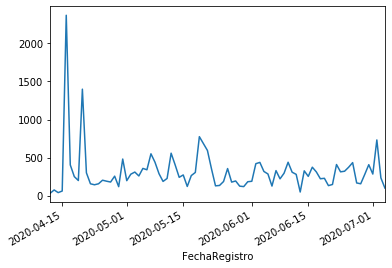

In [91]:
df3.groupby(['FechaRegistro'])['FechaRegistro'].count().plot()

In [42]:
df3.groupby(['FechaRegistro'])['FechaRegistro'].count().sort_values(ascending=False).head(19)

FechaRegistro
2020-04-16    2370
2020-04-20    1399
2020-05-19     775
2020-07-02     740
2020-05-21     595
2020-05-12     558
2020-05-07     550
2020-04-30     481
2020-05-08     439
2020-06-10     439
2020-06-26     437
2020-06-03     437
2020-06-02     425
2020-06-30     414
2020-06-22     412
2020-04-17     405
2020-05-13     404
2020-06-25     376
2020-06-16     375
Name: FechaRegistro, dtype: int64

In [92]:
df3.groupby('RESULTADO')['RESULTADO'].count()

RESULTADO
1     2214
2     4287
3    19335
Name: RESULTADO, dtype: int64

In [93]:
print(len(df1))
df3 = df1.drop_duplicates(keep='last')
# print(len(df3))
df3 = df3.drop_duplicates('ID_REGISTRO',keep='last')
# print(len(df3))

269134


In [94]:
len(df3)

25836

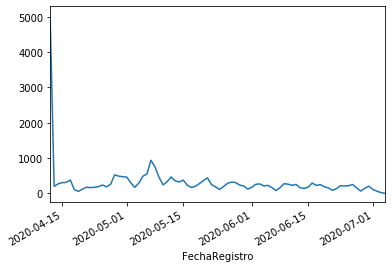

In [95]:
df3.groupby(['FechaRegistro'])['FechaRegistro'].count().plot()

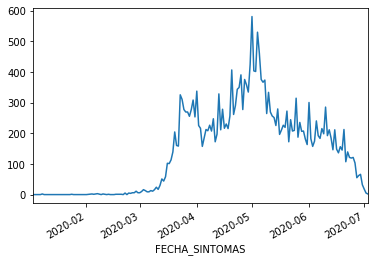

In [96]:
df3.groupby(['FECHA_SINTOMAS'])['FECHA_SINTOMAS'].count().plot()

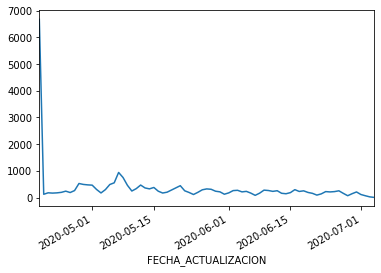

In [97]:
df3.groupby(['FECHA_ACTUALIZACION'])['FECHA_ACTUALIZACION'].count().plot()

In [100]:
df3[df3.FECHA_SINTOMAS<'2020-02-28'].groupby('RESULTADO')['RESULTADO'].count()

RESULTADO
1     2
2    64
3    20
Name: RESULTADO, dtype: int64

# personas que siguen en el sistema

In [102]:
# we extract the records that does not live in the last report
dfO1 = df0[df0.ID_REGISTRO.isin(tracket_cases)]
dfO1 = dfO1.copy()
dfO1.shape


(21918906, 36)

In [103]:
# df0.FechaRegistro = pd.to_datetime(df0['FechaRegistro'], format='%Y-%m-%d')
dfO1.FECHA_SINTOMAS = pd.to_datetime(dfO1['FECHA_SINTOMAS'], format ='%Y-%m-%d')
dfO1.FECHA_ACTUALIZACION = pd.to_datetime(dfO1['FECHA_ACTUALIZACION'], format ='%Y-%m-%d')
dfO1.FechaRegistro = pd.to_datetime(dfO1['FechaRegistro'], format ='%Y-%m-%d')
dfO1['delta_lastRecord'] = (dfO1.FECHA_ACTUALIZACION-dfO1.FechaRegistro ).dt.days
dfO1['deltaReporte'] = (dfO1.FechaRegistro-dfO1.FECHA_SINTOMAS).dt.days
dfO1[dfO1.FECHA_SINTOMAS<'2020-02-29'].groupby('RESULTADO')['RESULTADO'].count()



RESULTADO
1      1527
2    153486
3       331
Name: RESULTADO, dtype: int64

# buscamos el número de correcciones

In [104]:
dfO1.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI', 'FechaRegistro', 'delta_lastRecord',
       'deltaReporte'],
      dtype='object')

In [155]:
# sort_values(by='FechaRegistro', ascending=False).head()

dfO13 = dfO1.drop_duplicates(['ID_REGISTRO', 
       'FECHA_INGRESO', 'FECHA_SINTOMAS', ],keep='first')
dfO13 = dfO13.copy()

In [156]:
dfO13.groupby('ID_REGISTRO')['FECHA_ACTUALIZACION'].count().sort_values( ascending=False)

ID_REGISTRO
0a2098    4
113be4    4
002c3f    3
007f40    3
1a7c74    3
         ..
1452eb    1
1452ea    1
1452e4    1
1452e3    1
000002    1
Name: FECHA_ACTUALIZACION, Length: 641142, dtype: int64

In [160]:
dfO131 = dfO13[dfO13.FECHA_SINTOMAS<'2020-02-29']
dfO131.groupby('ID_REGISTRO')['FECHA_ACTUALIZACION'].count().sort_values( ascending=False).head(10)

ID_REGISTRO
0304ae    2
02a0df    2
0226ad    2
13fb66    2
0632c1    2
1732a3    2
09ab34    1
09a8f7    1
09a8af    1
09a72f    1
Name: FECHA_ACTUALIZACION, dtype: int64

In [159]:
dfO131[dfO131.ID_REGISTRO.isin(['0304ae','02a0df','0226ad','13fb66','0632c1','1732a3',])][['ID_REGISTRO', 
        'FECHA_SINTOMAS','FECHA_INGRESO',]].sort_values(['ID_REGISTRO','FECHA_SINTOMAS'], ascending=False)

,ID_REGISTRO,FECHA_SINTOMAS,FECHA_INGRESO
45837,1732a3,2020-02-06,2020-04-14
55559,1732a3,2020-02-06,2020-04-07
224695,13fb66,2020-01-09,2020-01-09
34894,13fb66,2020-01-02,2020-01-04
118033,0632c1,2020-02-12,2020-02-15
6076,0632c1,2020-02-12,2020-03-15
245193,0304ae,2020-01-28,2020-01-28
27433,0304ae,2020-01-27,2020-01-28
265357,02a0df,2020-02-20,2020-02-21
2333,02a0df,2020-02-20,2020-03-31


In [141]:
dfO131['deltaCorrección'] = (dfO131.FECHA_INGRESO-dfO131.FECHA_SINTOMAS).dt.days

In [145]:
dfO131.groupby('ID_REGISTRO')['deltaCorrección'].count().sort_values( ascending=False).head(50)

ID_REGISTRO
1732a3    2
13fb66    2
0632c1    2
0304ae    2
02a0df    2
0226ad    2
Name: deltaCorrección, dtype: int64